In [ ]:
# !pip install uv

In [ ]:
# !uv pip install "transformers<5" torch scikit-learn pandas numpy rdkit hestia-good

Using Python 3.12.12 environment at: /usr
Audited 7 packages in 124ms


In [1]:
!wget https://raw.githubusercontent.com/IBM/Hestia-GOOD/refs/heads/main/tests/biogen_logS.csv

--2026-02-19 09:11:52--  https://raw.githubusercontent.com/IBM/Hestia-GOOD/refs/heads/main/tests/biogen_logS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188002 (184K) [text/plain]
Saving to: ‘biogen_logS.csv’

biogen_logS.csv     100%[===================>] 183.60K  --.-KB/s    in 0.06s   

2026-02-19 09:11:53 (3.07 MB/s) - ‘biogen_logS.csv’ saved [188002/188002]



In [2]:
import pandas as pd
from hestia.partition import scaffold

df = pd.read_csv('biogen_logS.csv')
df.head()

,Internal ID,Vendor ID,SMILES,CollectionName,logS
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,-5.548020
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,-5.071409
2,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,-3.925969
3,Mol6,316230505,CC#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C...,emolecules,-4.535280
4,Mol9,EN300-97039,C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)...,enamineBB_pmc,-4.709963


In [3]:
parts = scaffold(df, field_name='SMILES',
                 label_name='logS')
train_df = df.iloc[parts[0], :]
test_df = df.iloc[parts[1], :]
valid_df = df.iloc[parts[2], :]


In [4]:
train_df.head()

,Internal ID,Vendor ID,SMILES,CollectionName,logS
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,-5.548020
1369,Mol1448,30492932,Cc1ccc(-c2nnc([C@H]3CCN(Cc4cc5ccccc5o4)C3)o2)cc1,emolecules,-4.354216
1367,Mol1446,35754185,COc1cccc(CN(C)c2ncnc3c2CN(C)CC3)c1,emolecules,-3.713383
1366,Mol1445,1556512,Nc1ccc2c(c1)ncn2CCc1ccccc1,emolecules,-3.791091
1365,Mol1444,32037496,N#Cc1ccccc1OCc1csc(-c2ncccn2)n1,emolecules,-4.365386


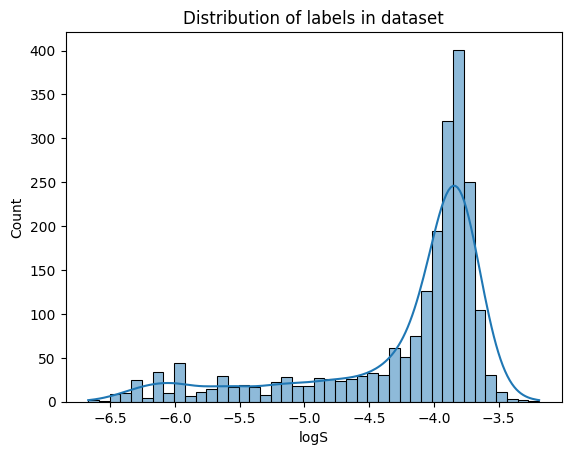

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df.logS, kde=True)
plt.title("Distribution of labels in dataset")
plt.show()

# Chemical Language Models for molecular representation

We are going to use the transformers library to get the models that we need and control them.

There are two models that I would recommend using, but if you find any other models and want to try them feel free.

- Molformer-XL: [ibm/MoLFormer-XL-both-10pct](https://huggingface.co/ibm-research/MoLFormer-XL-both-10pct)
- ChemBERTa-2: [DeepChem/ChemBERTa-77M-MLM](https://huggingface.co/DeepChem/ChemBERTa-77M-MLM)



In [9]:
model_name : str = "<introduce model name from above>"
model_name = "ibm-research/MoLFormer-XL-both-10pct"

In [10]:
# Model loading
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained(model_name, deterministic_eval=True, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)


config.json: 0.00B [00:00, ?B/s]

configuration_molformer.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm-research/MoLFormer-XL-both-10pct:
- configuration_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molformer.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm-research/MoLFormer-XL-both-10pct:
- modeling_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/187M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenization_molformer_fast.py: 0.00B [00:00, ?B/s]

tokenization_molformer.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm-research/MoLFormer-XL-both-10pct:
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/ibm-research/MoLFormer-XL-both-10pct:
- tokenization_molformer_fast.py
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [11]:
padding    = "longest"
max_length = 128
truncation = True

tokens = tokenizer(df['SMILES'].tolist(),
                   max_length=max_length,
                   truncation=truncation,
                   padding=True)

In [41]:
from itertools import batched
import numpy as np
import torch

inputs = tokens['input_ids']
attention_mask = tokens['attention_mask']
reps = []
for batch in batched(range(len(inputs)), 32):
    batch_inputs = [inputs[i] for i in batch]
    batch_attention_mask = [attention_mask[i] for i in batch]
    rep = model(input_ids=torch.tensor(batch_inputs),
                attention_mask=torch.tensor(batch_attention_mask)).last_hidden_state
    # When performing the aggregation step, its important
    # to make sure that the padded tokens are not
    # considered.
    # The `attention_mask` from the tokenizer will have
    # 0 for the padded tokens and 1 for the actual tokens
    for e, r in zip(rep, batch_attention_mask):
        # Take the mean
        r = torch.tensor(r)
        e = e[r == 1].mean(0)

        # Take the first token
        # e = e.last_hidden_state[0, :]
        # Take the last token
        # e = e.last_hidden_state[0, :]
        reps.append(e.detach().cpu().numpy())

reps = np.stack(reps)
reps = reps.reshape(-1, reps.shape[-1])
reps.shape

(2173, 768)

In [42]:
import numpy as np
from scipy.stats import spearmanr, pearsonr

def regression_metrics(y_true: np.ndarray, y_pred: np.ndarray):
    """
    Calculate MSE, MAE, SPCC, and PCC between ground truth and predictions.

    Args:
        y_true (np.ndarray): Ground truth values
        y_pred (np.ndarray): Predicted values

    Returns:
        dict: Dictionary containing mse, mae, spcc, pcc
    """

    # Ensure inputs are numpy arrays
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    if y_true.shape != y_pred.shape:
        raise ValueError("y_true and y_pred must have the same shape.")

    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)

    # Mean Absolute Error
    mae = np.mean(np.abs(y_true - y_pred))

    # Pearson Correlation Coefficient
    pcc, _ = pearsonr(y_true, y_pred)

    # Spearman Rank Correlation Coefficient
    spcc, _ = spearmanr(y_true, y_pred)

    return {
        "MSE": mse,
        "MAE": mae,
        "PCC": pcc,
        "SPCC": spcc
    }

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from itertools import product
from tqdm import tqdm

# Hyperparameter Optimisation (crude grid search)

n_estimators = [10, 20, 50, 100, 200, 500, 1000]
max_depth = [10, 20, 50, 100]
min_samples_split = [2, 4, 8, 16]
max_features = [0.5, 0.75, 0.9, 0.95, 1.0]

params = product(n_estimators, max_depth, min_samples_split, max_features)
params = list(params)

# parts[0] contains the indices for samples in training
# parts[1] contains the indices for samples in testing
# parts[2] contains the indices for samples in validation
train_x = reps[parts[0]]
train_y = df.loc[parts[0], 'Y'].to_numpy()
test_x = reps[parts[1]]
test_y = df.loc[parts[1], 'Y'].to_numpy()
valid_x = reps[parts[2]]
valid_y = df.loc[parts[2], 'Y'].to_numpy()

best_metric = -np.inf
pbar = tqdm(params)
for idx, param_comb in enumerate(pbar):
    model = RandomForestRegressor(
        n_estimators=param_comb[0],
        max_depth=param_comb[1],
        min_samples_split=param_comb[2],
        max_features=param_comb[3]
    )
    model.fit(train_x, train_y)
    preds = model.predict(valid_x)
    metrics = regression_metrics(valid_y, preds)

    if metrics['spcc'] > best_metric:
        best_metric = metrics['spcc']
        best_comb = param_comb
        pbar.set_description(f"Best step {idx} - SPCC: {best_metric}")

# Retrain model in training+validation data
model = RandomForestRegressor(
    n_estimators=best_comb[0],
    max_depth=best_comb[1],
    min_samples_split=best_comb[2],
    max_features=best_comb[3]
)
model.fit(np.concat([train_x, valid_x]), np.concat([train_y, valid_y]))
preds = model.predict(test_x)
metrics = regression_metrics(test_y, preds)
print(pd.DataFrame(metrics))
